### 히스토그램 그리기 

In [51]:
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''
    hist() 함수 사용
    히스토그램은 자료의 도수분포 상태를 직사각형 막대그래프로 나타낸것
    데이타의 빈도(도수)에 따라서 높이가 결정된다. 
    plot() 함수를 이용해서 직선 혹은 꺽은선을
    scatter() 함수를 이용해서 산포도(산점도)를 그렸듯이
    hist() 함수를 이용해서 막대그래프를 그려보자 
'''

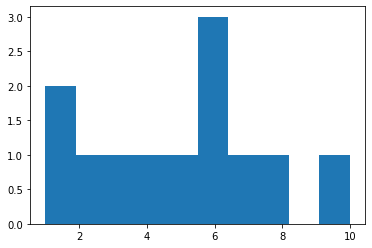

In [4]:
plt.hist([1,1,2,3,4,5,6,6,6,7,8,10])
plt.show()

In [8]:
dice=[]
for i in range(5):
    dice.append(np.random.randint(1,7))
dice

[2, 4, 3, 3, 3]

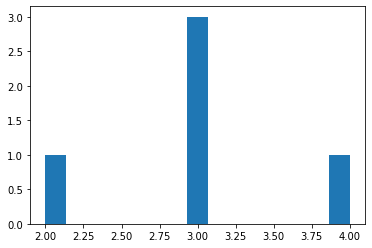

In [12]:
'''
    bins 가 작으면 막대그래프가 뭉뚱그려진다.
    bins 가 너무 큰값이면 막대그래프가 촘촘해짐
    히스토 그램을 그릴때 bins 값을 잘 지정하는것이 중요 
    기본값도 적당하다. 
    
    bins 해당 막대의 영역을 얼마나 채울건지를 결정하는 값 
'''
plt.hist(dice, bins=15)
plt.show()

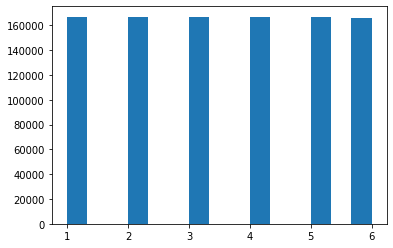

In [14]:
'''
    주사위를 던지는 횟수를 늘릴수록 특정한 숫자가 나오는 횟수가 전체의 1/6에 가까워진다. '큰수의 법칙'을 히스토그램으로 확인
'''
dice=[]
for i in range(1000000):
    dice.append(np.random.randint(1,7))
plt.hist(dice, bins=15)
plt.show()

<a list of 10 Patch objects>


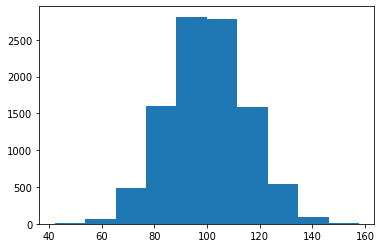

In [23]:
mu, sigma =100,15
x = mu+sigma*np.random.randn(10000)
len(x)
x.shape
# n 값의 정보들 
# bins 구간 좌표
# patches 그래프의 정보 
n,bins,patches =plt.hist(x)
print(patches)
# plt.show()

<a list of 50 Patch objects>
[ 42.08764618  44.39959924  46.7115523   49.02350536  51.33545843
  53.64741149  55.95936455  58.27131761  60.58327068  62.89522374
  65.2071768   67.51912986  69.83108293  72.14303599  74.45498905
  76.76694211  79.07889518  81.39084824  83.7028013   86.01475436
  88.32670743  90.63866049  92.95061355  95.26256661  97.57451968
  99.88647274 102.1984258  104.51037886 106.82233193 109.13428499
 111.44623805 113.75819111 116.07014418 118.38209724 120.6940503
 123.00600336 125.31795643 127.62990949 129.94186255 132.25381561
 134.56576868 136.87772174 139.1896748  141.50162786 143.81358093
 146.12553399 148.43748705 150.74944011 153.06139317 155.37334624
 157.6852993 ]


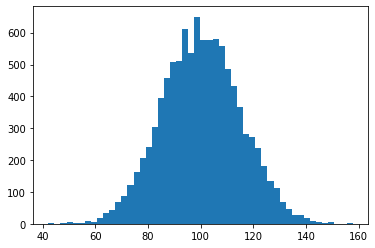

In [27]:
n,bins,patches =plt.hist(x,bins=50) # plt.hist(x,bins=50) 여기서 bins 는 y값 좌표 갯수 
print(patches)
print(bins)

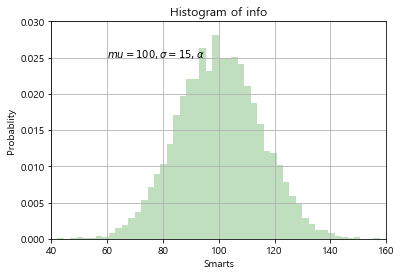

In [47]:
n,bins,patches = plt.hist(x, bins =50,
                         density=1,
                         facecolor='g',
                         alpha=0.25, # 투명도 0~1
                         )
plt.xlabel('Smarts')
plt.ylabel('Probablity')
plt.title('Histogram of info')
plt.grid()
plt.text(60,0.025,r'$mu=100, \sigma=15, \alpha $') # 기호를 사용시 $ $ 안에 \기호 이름 작성 하면 됨 
plt.axis([40,160,0,0.03]) # 그래프의 크기와 사이즈를 자를때 사용 
plt.show()

In [52]:
# plot 시 한글이 깨지는 현상 방지!

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!') 

## Pandas를 이용한 plot 시각화 

In [73]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000',
                                 periods=1000)) # 기본값이 day
ts

2000-01-01   -0.597804
2000-01-02    0.533461
2000-01-03    0.680292
2000-01-04    1.191332
2000-01-05   -0.464239
                ...   
2002-09-22    1.321576
2002-09-23   -0.525734
2002-09-24   -0.578047
2002-09-25   -1.123371
2002-09-26   -1.020273
Freq: D, Length: 1000, dtype: float64

In [ ]:
ts = ts.cumsum() #누적된 값으로  표현 

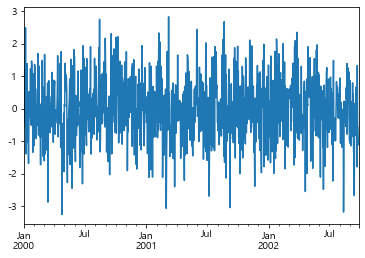

In [74]:
ts.plot()

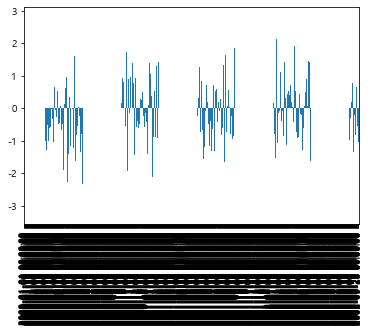

In [77]:
ts.plot(kind='bar')

In [80]:
x= np.linspace(0,14,100) #0 부터 14 까지의 값을 100간격으로 쪼갤때 사용
x
y= np.sin(x)


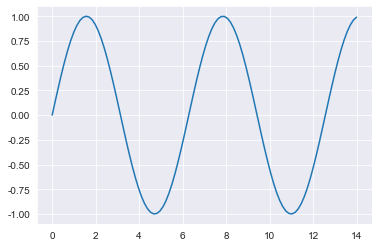

In [85]:
# sns.set_style('dark')
# sns.set_style('darkgrid')
plt.plot(x,y)
plt.show()

## Seborn - Boxplot

In [89]:
# 0 부터 100까지의 총 101개의 숫자를 만든다. 
xs = np.linspace(start=0, stop=100,num=101)
xs

df= DataFrame(xs,columns=['feature'])
df

,feature
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
...,...
96,96.0
97,97.0
98,98.0
99,99.0


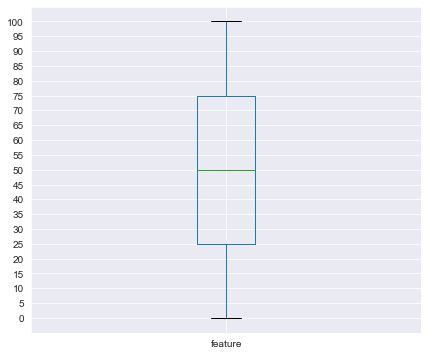

In [92]:
'''
    25,75 사이에 박스가 그려지고 중앙값인 50에 녹색선이 그려진다.
    최소값 0과 최대값 100에 검은색 가로선이 그려진다.
    전체 데이타를 4등분
    4분위 
'''
plt.figure(figsize=(7,6)) #크기 지정
df.boxplot(column=['feature'])
plt.yticks(np.arange(0,101,step=5))
plt.show()

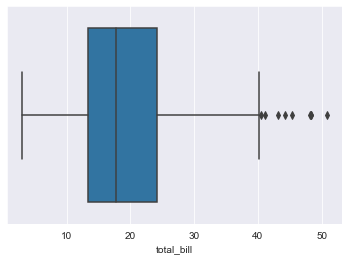

In [107]:
tips =sns.load_dataset('tips')
tips.head()

# plt.figure(figsize=(10,5)) #크기 지정
# tips.boxplot(column=['total_bill'])
# plt.yticks(np.arange(0,50,step=5))
# plt.show()
sns.boxplot(tips['total_bill'])
plt.show()

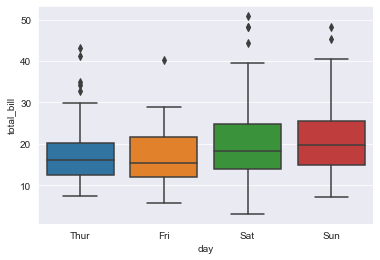

In [110]:
# 요일별 음식 지불 금액 
sns.boxplot(x='day',y='total_bill',data =tips)
plt.show()

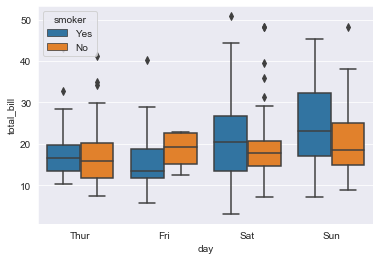

In [112]:
'''
    요일별로 살펴본 흡연, 비흡연자들의 전체 total_bill 의 boxplot
    hue : 서로 비교해서 살펴볼 매개변수를 지정할 때 사용 , 색상으로 대조해서 나타난다.
'''
sns.boxplot(x='day',y='total_bill',hue='smoker',data =tips)
plt.show()

### Boxplot 이상치 값 제거하기

In [ ]:
'''
    boxplot 이상치값 제거하는 방법
    1) 이상치값 제거
    2) 이상치값 변환 -- NaN 많이 사용함 
    
'''

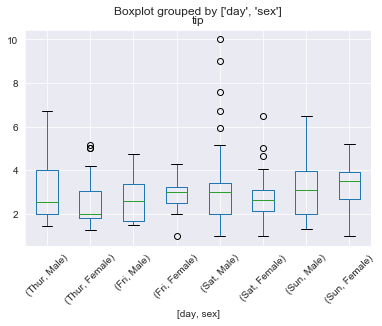

In [120]:
z = tips.boxplot(column='tip', by=['day','sex'])
plt.xticks(rotation=45)
plt.show()

In [131]:
# 이상치값 제거함수

def removeQutlier(x, column):
    # Q1, Q3 구하기
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    
    # iqt (IQR 범위를 벗어난 값...4 분위 범위를 벗어난 값)
    iqt = 1.5*(q3-q1)
    
    #원래 데이타 복제 
    y=x
    
    y['tip'][(tips['tip']> (q3+iqt)) | (tips['tip']<(q1-iqt))] = None
    
    y['tip']
    
    return(y)


C:\pcy\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


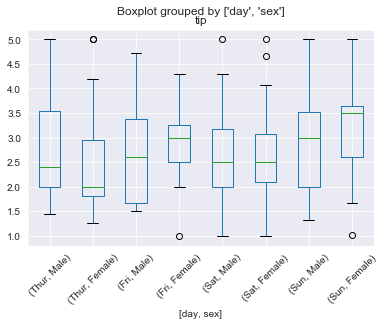

In [128]:
removeQutlier(tips,'tip').boxplot(column='tip', by=['day','sex'])
plt.xticks(rotation=45)
plt.show()

### lmplot

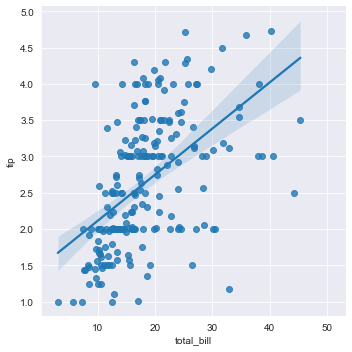

In [132]:
'''
    선
    쉐도우 
    의 의미를 정리 
    lmplot 데이타를 어떤 데이타에 적용시키면 좋을지
    각각의 그래프별 특징... 정리한 결과물
'''

sns.lmplot(x='total_bill',y='tip', data=tips)
plt.show()

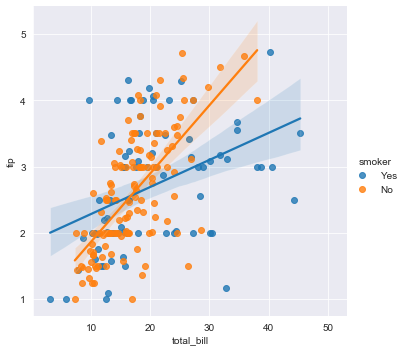

In [133]:
'''
    total_bill 에 따른 팁을 더 많이 주는 사람이 
    흡연자인지 비흡연자인지 알고 싶음 hue 사용
'''

sns.lmplot(x='total_bill',y='tip',hue='smoker', data=tips)
plt.show()

## HeatMamp

In [135]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [138]:
# pivot 사용해서 month를 인덱스 컬럼을 year, 벨류를 passenger 로 
temp= flights.pivot_table('passengers',index='month',columns='year')

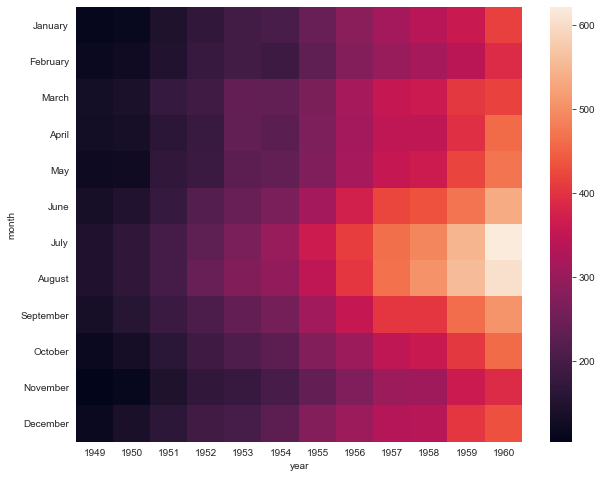

In [139]:
plt.figure(figsize=(10,8))
sns.heatmap(temp) # 디폴트 값이 안보임 
plt.show()

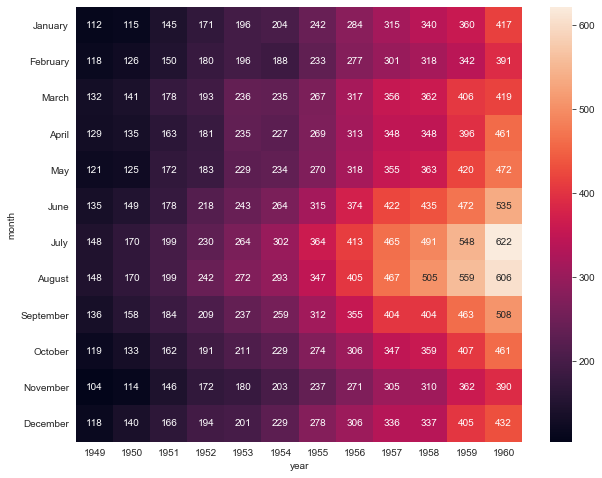

In [141]:
'''
    x축은 year
    y축은 month가 된다.
    
    값이 점점 커지는 쪽은 점점 환해지는 쪽 
    1960sus 7월 ...휴가철 
    
'''
plt.figure(figsize=(10,8))
sns.heatmap(temp,annot=True,fmt='d') # 디폴트 값이 안보임 
plt.show()